<a href="https://colab.research.google.com/github/SHUBHAM4181/Code-Challenge-Day-1/blob/master/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/income.data.csv')
df_binary = df[['income', 'happiness']]
  
df_binary.columns = ['income', 'happiness']
  
df_binary.head()
  

FileNotFoundError: ignored

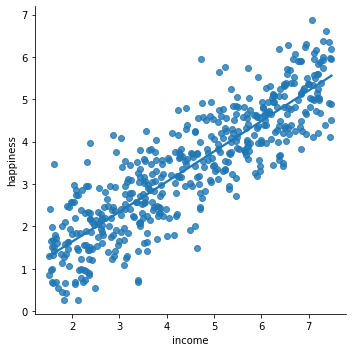

In [ ]:
sns.lmplot(x ="income", y ="happiness", data = df_binary, order = 2, ci = None)


In [ ]:

df_binary.fillna(method ='ffill', inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
X = np.array(df_binary['income']).reshape(-1, 1)
y = np.array(df_binary['happiness']).reshape(-1, 1)

df_binary.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.7058614342869816


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


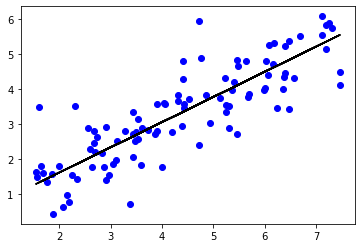

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()



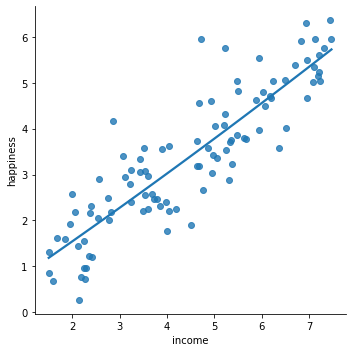

In [ ]:
df_binary100 = df_binary[:][:100]
sns.lmplot(x ="income", y ="happiness", data = df_binary100,order = 2, ci = None)


In [ ]:
df_binary100.fillna(method ='ffill', inplace = True)
X = np.array(df_binary100['income']).reshape(-1, 1)
y = np.array(df_binary100['happiness']).reshape(-1, 1)
df_binary100.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.5550794852752718


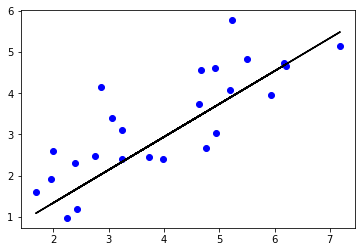

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()


In [ ]:
model= sm.OLS(X_train,y_train).fit()
# model= sm.OLS(y_train,x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2280.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):                    2.40e-57
Time:                        10:10:22   Log-Likelihood:                         -96.268
No. Observations:                  75   AIC:                                      194.5
Df Residuals:                      74   BIC:                                      196.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------